# Practice Exam

### Imporing the relevant libraries

In [72]:
import pandas as pd
# This method will help us split the data into training and testing datasets
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

# This class will help us create a KNN regression model
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier

# This class will help us create a Linear regression model
from sklearn.linear_model import LinearRegression

# This method will help us calculate the mean squared error for each model
from sklearn.metrics import mean_squared_error

# This library will help us organize our data
import pandas as pd

# We import the sine function which will help us generate our non-linear data
from math import sin

# Import the numpy library
import numpy as np

# These libraries will help us visualize the results
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression

### Tony's shop

In [256]:
x_train, y_train =make_blobs(n_samples=200,n_features=2,centers=[(-1, 1), (-2, 5), (4, 0),(3,6)],random_state=365,cluster_std=2)
x_test, y_test = make_blobs(n_samples = 160, n_features=2,centers = [(-1, 1), (-2, 5), (4, 0),(3,6)], random_state = 365,cluster_std=2)


In [257]:
y_train.shape

(200,)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

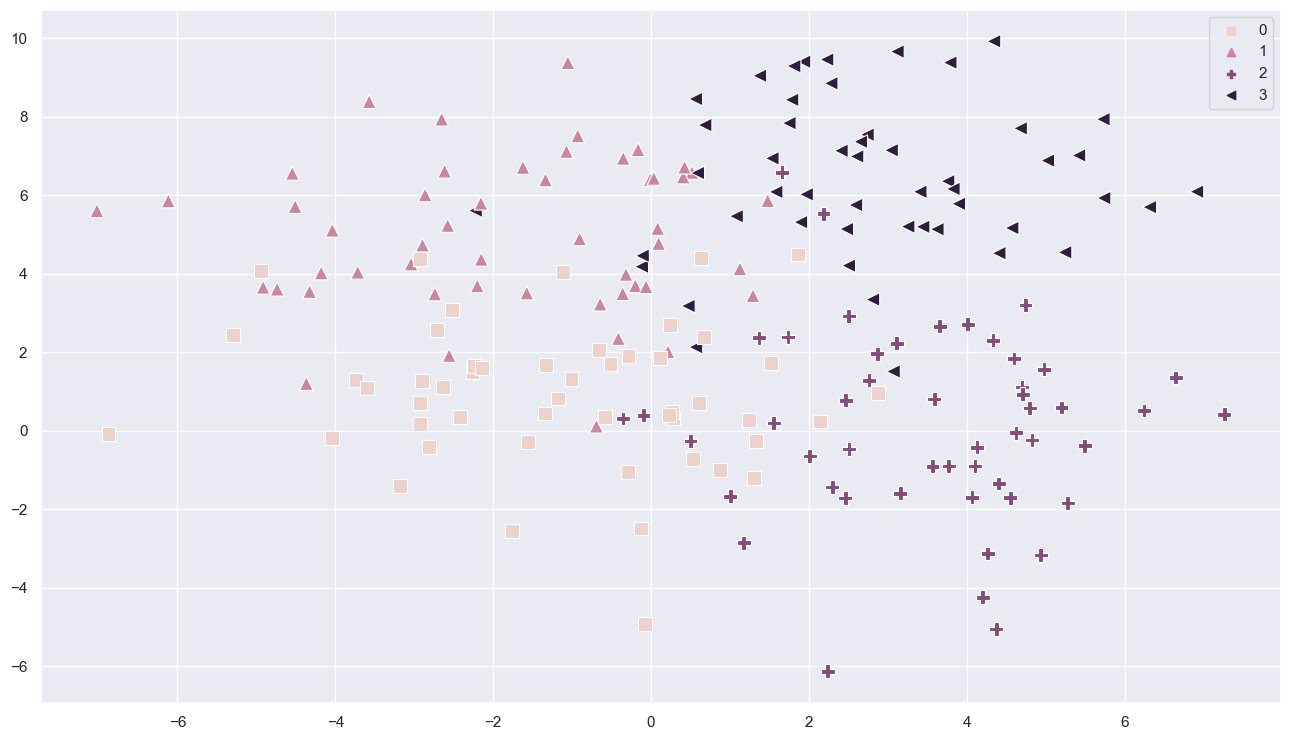

In [258]:
sns.set()
plt.figure(figsize=(16,9))
sns.scatterplot(x_train[:,0],x_train[:,1],hue=y_train,markers=[',', '^', 'P',"<"],style=y_train,s=100)

In [276]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [280]:
knn=KNeighborsClassifier(n_neighbors=3,weights="uniform")
knn=knn.fit(x_train,y_train)
knn.predict([[2,4]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0])

In [281]:
knn=KNeighborsClassifier(n_neighbors=5,weights="uniform")
knn=knn.fit(x_train,y_train)
knn.predict([[2,4]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1])

In [282]:
knn=KNeighborsClassifier(n_neighbors=5,weights="distance")
knn=knn.fit(x_train,y_train)
knn.predict([[2,4]])

array([3])

In [284]:
parameters={"n_neighbors":range(1,21),"p":range(1,6),"weights":["uniform","distance"]}
grid_search=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=parameters,scoring="accuracy")

In [285]:
grid_search.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21), 'p': range(1, 6),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [289]:
grid_search.best_params_

{'n_neighbors': 16, 'p': 4, 'weights': 'uniform'}

In [290]:
knn=KNeighborsClassifier(n_neighbors=16,p=4,weights="uniform")
knn=knn.fit(x_train,y_train)
y_test_pred=knn.predict(x_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        40
           1       0.77      0.82      0.80        40
           2       0.89      0.78      0.83        40
           3       0.86      0.78      0.82        40

    accuracy                           0.80       160
   macro avg       0.81      0.80      0.80       160
weighted avg       0.81      0.80      0.80       160



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


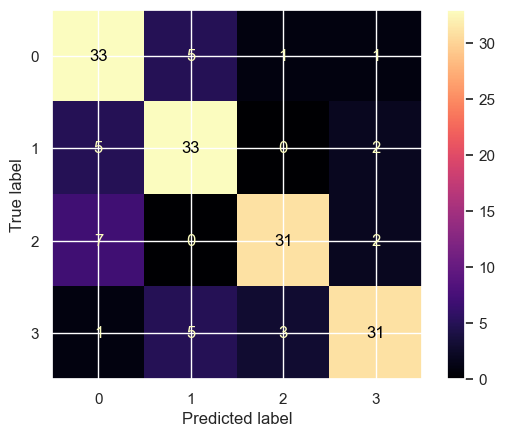

In [288]:
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,cmap="magma")

### Olive's shop

In [109]:
inputs, target = make_regression(n_samples = 150,n_features=1,noise=40,random_state=365)
inputs.shape

(150, 1)

In [219]:
lnn=KNeighborsRegressor(n_neighbors=5)

In [220]:
lnn=lnn.fit(inputs,target)

In [221]:
lnn.predict([[2]])

array([69.72228441])